<a href="https://colab.research.google.com/github/JSJeong-me/KOSA-Big-Data_Vision/blob/main/Pretrained-model/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### https://keras.io/ko/applications/
!pip uninstall -y keras
!pip uninstall -y tensorflow

Found existing installation: keras 2.6.0
Uninstalling keras-2.6.0:
  Successfully uninstalled keras-2.6.0
Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0


### https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/

In [ ]:
!pip install -r ./requirements.txt

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [ ]:
# load the model
model = VGG16()

In [5]:
from keras.utils.vis_utils import plot_model

In [6]:
plot_model(model, to_file='vgg.png')

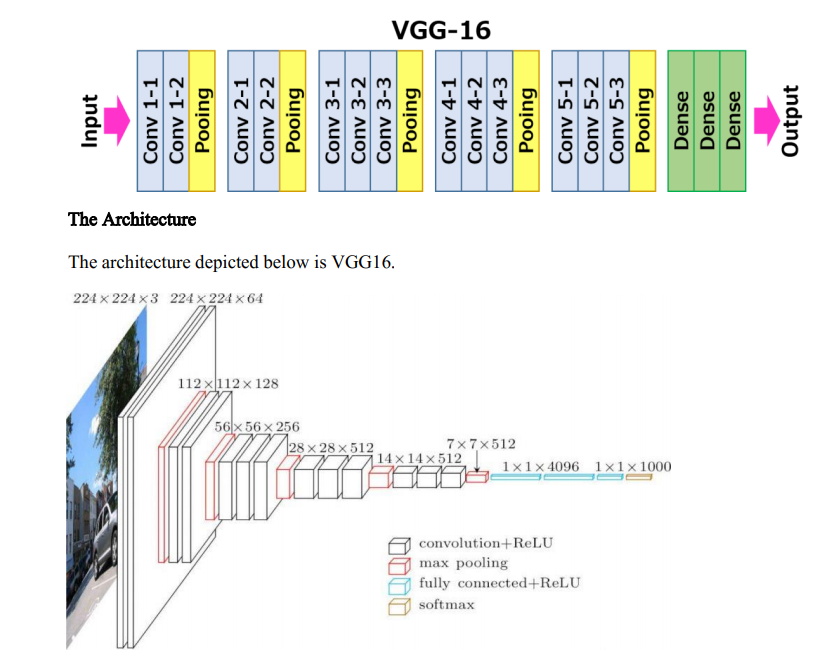

In [7]:
# load an image from file
img_path = "otter1.jpg"
image = load_img(img_path, target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)

In [8]:
# reshape data for the model
# We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.
# The network expects one or more images as input; 
# that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.

image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

# prepare the image for the VGG model
image = preprocess_input(image)

# predict the probability across all output classes
yhat = model.predict(image)

# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability

40960/35363 [==================================] - 0s 0us/step


In [ ]:
label0 = label[0][0]
#label1 = label[0][4]
# print the classification
print('%s %s (%.2f%%)' % (label0[0], label0[1], label0[2]*100))
#print('%s %s (%.2f%%)' % (label1[0], label1[1], label1[2]*100))

In [ ]:
import os
import sys
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

image = Image.open(img_path).convert("RGB")

plt.figure(figsize=(25,20))
plt.imshow(image)
plt.show()
plt.close()